## K Means Clustering Algorithms Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [ ]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [ ]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

In [ ]:
X.shape

(1000, 2)

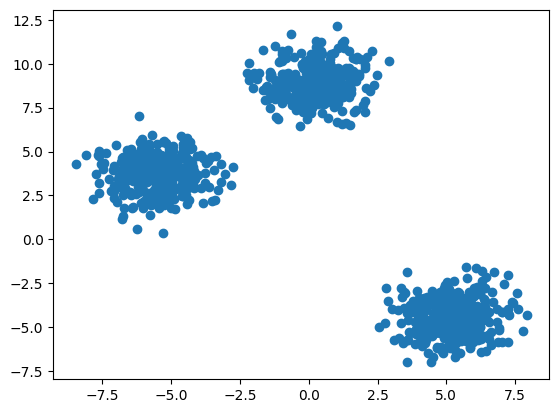

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1171.5475920078047,
 992.6978843650659,
 934.4925933459587,
 757.0228730010184,
 676.8644299544931,
 627.8892220828261,
 543.7202502404343]

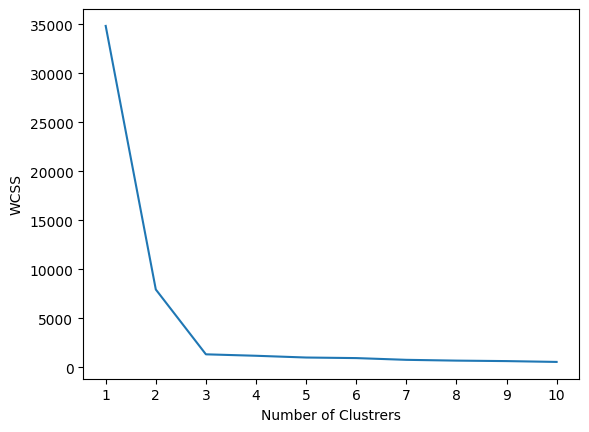

In [ ]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [ ]:
y_labels=kmeans.fit_predict(X_train)

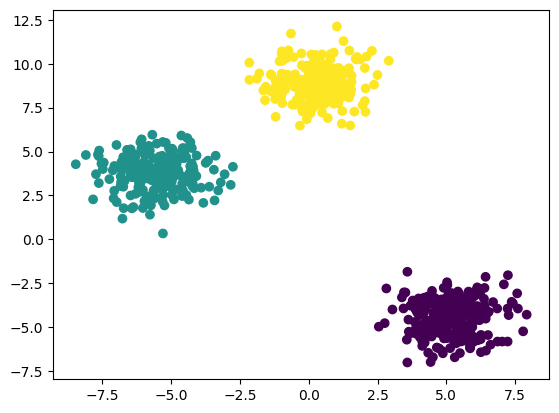

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [ ]:
## knee locator
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

np.int64(3)

In [ ]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6453998806728021),
 np.float64(0.5057993858673796),
 np.float64(0.32757294847475843),
 np.float64(0.3447871608539105),
 np.float64(0.3457463039658347),
 np.float64(0.32758936884084333),
 np.float64(0.3390487276626262)]

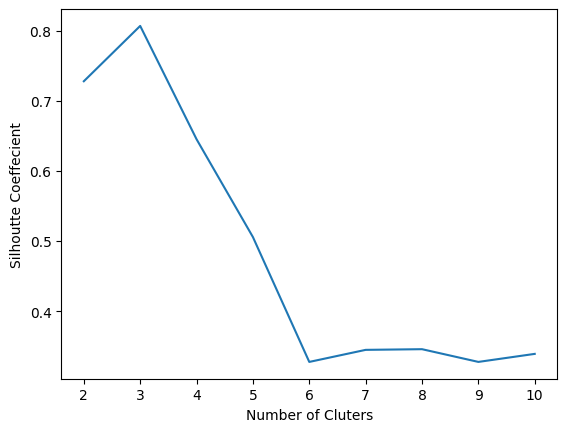

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()